In [1]:
import os
import sys
base_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))
sys.path.append(base_path)
import json

from llama_index.llms import OpenAI
from llama_index.multi_modal_llms.openai import OpenAIMultiModal
from pdf_data_extractor import SearchablePDF
from pdf_data_extractor.src.utils import readJsonFile

In [2]:
pdf_path = os.path.join(base_path, 'demo_data/he-specification.pdf')
json_schema_path = os.path.join(base_path, 'demo_data/he-specification_schema.json')
json_value_path = os.path.join(base_path, 'demo_data/he-specification.json')

json_value_string = readJsonFile(json_value_path)
json_schema_string = readJsonFile(json_schema_path)

if json value that represents information of pdf is present

In [3]:
chat_llm = OpenAI('gpt-3.5-turbo-0125', max_tokens=4000)
searchablePDF = SearchablePDF(pdf=pdf_path,
                              json_schema_string=json_schema_string,
                              json_value_string=json_value_string,
                              chat_llm=chat_llm,
                              verbose=False)

In [4]:
response = searchablePDF.query('what is the temp of side 1 and side 2?')
response['message_history'][-1]

{'message': 'The temperature of side 1 is 130°C, and the temperature of side 2 is also 130°C.',
 'is_user': False}

if json value is not present

In [ ]:
chat_llm = OpenAI('gpt-3.5-turbo-0125', max_tokens=4000)
searchablePDF = SearchablePDF(pdf=pdf_path,
                              json_schema_string=json_schema_string,
                              chat_llm=chat_llm,
                              verbose=True)

In [6]:
response = searchablePDF.query('What is the max tmep of side 1?')
response['message_history'][-1]

{'status': 'success',
 'message_history': [{'message': 'What is the max tmep of side 1?',
   'is_user': True},
  {'message': 'The maximum temperature of side 1 is 130 °C.',
   'is_user': False}],
 'focus_point': ('18', '51'),
 'bboxes': [[428, 358, 446, 409]],
 'degrees': 270,
 'relevant_json': {'technicalSpecifications': {'side1': {'maxTemperature': {'value': 130,
     'text': '130 °C',
     'unit': '°C',
     'bbox': [213.8605499267578,
      178.781005859375,
      222.8605499267578,
      204.34283447265625],
     'dir': [0.0, 1.0]}}}}}

Visualize bboxes from json_value

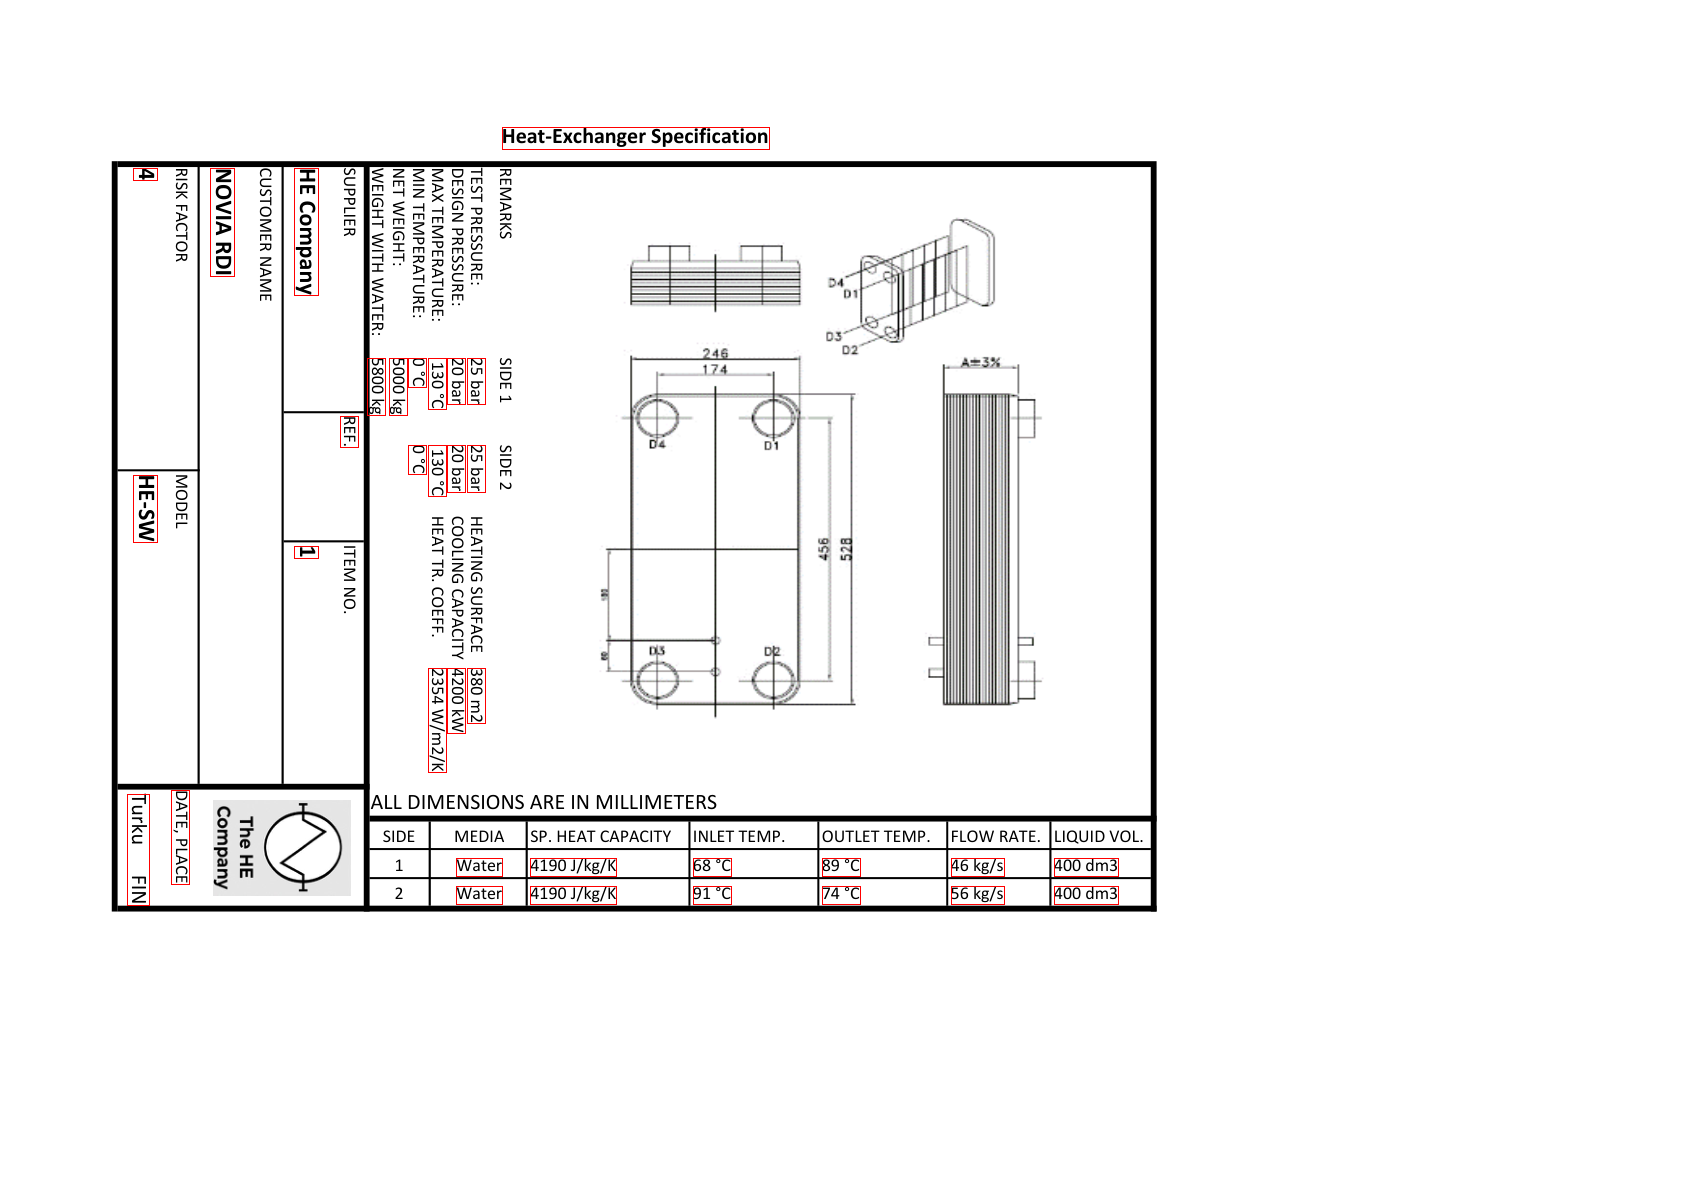

In [6]:
import fitz
from PIL import Image, ImageDraw
from pdf_data_extractor.src.utils import draw_rects, pdf_coords_to_img_coords, extraction_wrapper

bboxes, _ = extraction_wrapper(json.loads(searchablePDF.json_value_string))

pdf_height, pdf_width = searchablePDF.pdf.dimensions

pix = searchablePDF.pdf.page.get_pixmap(matrix=fitz.Matrix(2, 2))
pil_image = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
(im_width, im_height) = pil_image.size

im_draw=ImageDraw.Draw(pil_image)

for pdf_bbox in bboxes:
    im_bbox = pdf_coords_to_img_coords(pdf_bbox, pdf_height, pdf_width, im_width, im_height)

    im_draw.rectangle(im_bbox, outline ="red")

pil_image

In [9]:
json.loads(searchablePDF.json_value_string)

{'title': {'text': 'Heat-Exchanger Specification',
  'bbox': [250.91055297851562,
   63.220977783203125,
   384.2850341796875,
   74.26097869873047],
  'dir': [1.0, 0.0]},
 'nonTechnicalInformation': {'riskFactor': {'value': 4,
   'text': '4',
   'unit': '',
   'bbox': [66.5905532836914,
    84.10101318359375,
    78.5905532836914,
    90.18304443359375],
   'dir': [0.0, 1.0]},
  'customerName': {'text': 'NOVIA RDI',
   'bbox': [104.99053955078125,
    84.10101318359375,
    116.99053955078125,
    138.06024169921875],
   'dir': [0.0, 1.0]},
  'supplier': {'text': 'HE Company',
   'bbox': [146.99053955078125,
    84.10101318359375,
    158.99053955078125,
    147.38458251953125],
   'dir': [0.0, 1.0]},
  'itemNumber': {'value': 1,
   'text': '1',
   'unit': '',
   'bbox': [146.99053955078125,
    272.74102783203125,
    158.99053955078125,
    278.82305908203125],
   'dir': [0.0, 1.0]},
  'model': {'text': 'HE-SW',
   'bbox': [66.5905532836914,
    237.22100830078125,
    78.5905532836